<a href="https://colab.research.google.com/github/duyqu-chan/CS231n/blob/master/CatDogClassification_3_Conv_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat-Dog Classification Homework


First, we will get the raw data from a GitHub[ repo](https://github.com/ardamavi/Dog-Cat-Classifier/tree/master/Data/npy_train_data).

In [2]:
# X:
! wget https://github.com/ardamavi/Dog-Cat-Classifier/blob/master/Data/npy_train_data/X.npy?raw=true -O X.npy
  
# Y:
! wget https://github.com/ardamavi/Dog-Cat-Classifier/blob/master/Data/npy_train_data/Y.npy?raw=true -O Y.npy

--2019-06-19 04:27:12--  https://github.com/ardamavi/Dog-Cat-Classifier/blob/master/Data/npy_train_data/X.npy?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ardamavi/Dog-Cat-Classifier/raw/master/Data/npy_train_data/X.npy [following]
--2019-06-19 04:27:12--  https://github.com/ardamavi/Dog-Cat-Classifier/raw/master/Data/npy_train_data/X.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ardamavi/Dog-Cat-Classifier/master/Data/npy_train_data/X.npy [following]
--2019-06-19 04:27:12--  https://media.githubusercontent.com/media/ardamavi/Dog-Cat-Classifier/master/Data/npy_train_data/X.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.git

Now, we have the following files:

In [3]:
!ls

sample_data  X.npy  Y.npy


We can read the data as follows:

In [0]:
import numpy as np

X = np.load('X.npy')
Y = np.load('Y.npy')

## About the Dataset

There are 1400 images belonging to two classes (cat or dog). The resolution is 64x64 and there are 3 color channels for red, green and blue.

In [5]:
print('X Shape:', X.shape)
print('Y Shape:', Y.shape)

X Shape: (1400, 64, 64, 3)
Y Shape: (1400, 2)


Hopefully, we have uniform categorical distribution.

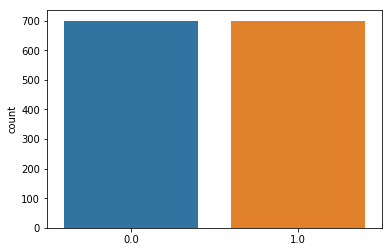

In [6]:
import seaborn as sns
category = Y[:,0]
sns.countplot(category)

Let's visualize 76th sample.

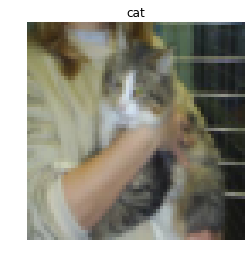

In [7]:
import matplotlib
import matplotlib.pyplot as plt

sample_index = 76
%matplotlib inline
img = X[sample_index]/255 #normalize the image vector into 0-255 range
labelArr = Y[sample_index]

#decode label
if (labelArr == [1, 0]).all():
  label = "cat"
else:
  label = "dog"
  
plt.imshow(img, interpolation='nearest')
plt.axis("off")
plt.title(label)
plt.show()

## Pre-processing

Normalization

In [8]:
from keras.utils import to_categorical

X /= 255.
#shuffle
idx = np.random.permutation(len(X))
X,Y= X[idx], Y[idx]


Using TensorFlow backend.


## Train/Test Split

We reserved 90% of the data for training and 10% for validation. To better represent test data with training data stratified sampling is used.

In [0]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(X,Y,test_size = 0.1,stratify=Y, random_state = 42) #random seed i sabitle

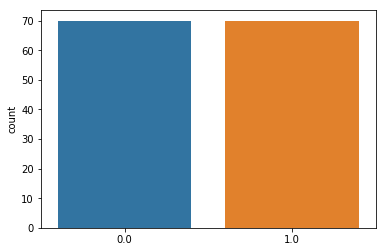

In [10]:
import seaborn as sns
category = Y_test[:,0]
sns.countplot(category)

## Building the Model

In [0]:
# parameters to be optimized
inputShape = (64, 64, 3)
classNum = Y.shape[1]
k1 = 5 # Kernel dimension of the 1st layer
f1 = 32 # the number of output filters in the 1st layer
k2 = 3 # Kernel dimension of the 2nd layer
f2 = 64 # the number of output filters in the 2nd layer
k3 = 3 # Kernel dimension of the 3rd layer
f3 = 128 # the number of output filters in the 3rd layer

d_conv = 0.25 # dropout rate of the convolutional layers
d_dense = 0.5 # dropout rate of the dense layer

Epochs = 45 # 
batchSize = 8 # number of randomly taken samples from features and labels to feed into each epoch until an epoch limit is reached.

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,  BatchNormalization, Conv2D, MaxPooling2D, Activation
from keras import backend as K
from keras.callbacks import LearningRateScheduler
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(filters=f1,kernel_size=(k1,k1),padding='Same',kernel_initializer="glorot_normal", 
                 input_shape = inputShape))
model.add(BatchNormalization())
#model.add(Activation('relu'))
# now add a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(d_conv))


model.add(Conv2D(filters=f2,kernel_size=(k2,k2),padding='Same',kernel_initializer="glorot_normal"))
model.add(BatchNormalization())
#model.add(Activation('relu'))
# now add a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate =d_conv))



model.add(Conv2D(filters = f3, kernel_size = (k3,k3),padding = 'Same',kernel_initializer="glorot_normal"))
model.add(BatchNormalization())
#model.add(Activation('relu'))
# now add a ReLU layer explicitly:
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(d_conv))
 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(rate =d_dense))
model.add(Dense(classNum, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 32, 32, 64)        0         
__________

## Compilation

In [0]:
# initiate RMSprop optimizer

#opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-2)
#opt = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
#opt = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#opt =keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
opt = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0)
#opt = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, #instead of annealer decay = DR can be set, too
              metrics=['accuracy'])
#annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

## Data Augmentation

In [23]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

print(X.shape)
datagen.fit(X)
print(X.shape)

(1260, 64, 64, 3)
(1260, 64, 64, 3)


## Training

In [24]:
# Fit the model
history = model.fit_generator(datagen.flow(X,Y, batch_size=batchSize),
                              epochs = Epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X.shape[0] // batchSize)
                              #, callbacks=[annealer])

Epoch 1/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5394 - acc: 0.7325 - val_loss: 0.5393 - val_acc: 0.7214
Epoch 2/45
157/157 [==============================] - 2s 12ms/step - loss: 0.5297 - acc: 0.7412 - val_loss: 0.4939 - val_acc: 0.7714
Epoch 3/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5124 - acc: 0.7635 - val_loss: 0.5603 - val_acc: 0.7286
Epoch 4/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5306 - acc: 0.7174 - val_loss: 1.1654 - val_acc: 0.5429
Epoch 5/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5297 - acc: 0.7301 - val_loss: 0.5413 - val_acc: 0.7000
Epoch 6/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5071 - acc: 0.7603 - val_loss: 0.9351 - val_acc: 0.5929
Epoch 7/45
157/157 [==============================] - 2s 13ms/step - loss: 0.5420 - acc: 0.7444 - val_loss: 0.4783 - val_acc: 0.7571
Epoch 8/45
157/157 [==============================] - 2s 13ms/step - 

## Training and Validation Performance

In [25]:
valLoss, valAcc = model.evaluate(X_test, Y_test, verbose=0)
trainLoss, trainAcc = model.evaluate(X, Y, verbose=0)
print("Validation Loss: {0:.6f}, Validation Accuracy: {1:.6f}".format(valLoss, valAcc))
print("Train Loss: {0:.6f}, Train Accuracy: {1:.6f}".format(trainLoss, trainAcc))

Validation Loss: 0.469004, Validation Accuracy: 0.778571
Train Loss: 0.326676, Train Accuracy: 0.857937


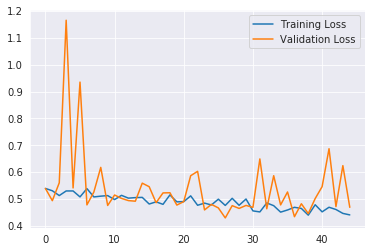

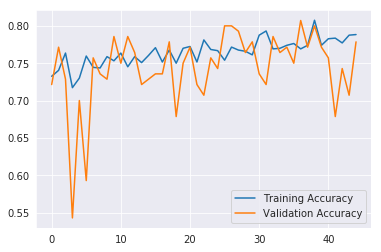

In [26]:
import seaborn as sns
sns.set_style("darkgrid")
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.show()
plt.plot(history.history['acc'],label = "Training Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.legend()
plt.show()

## Confusion Matrix

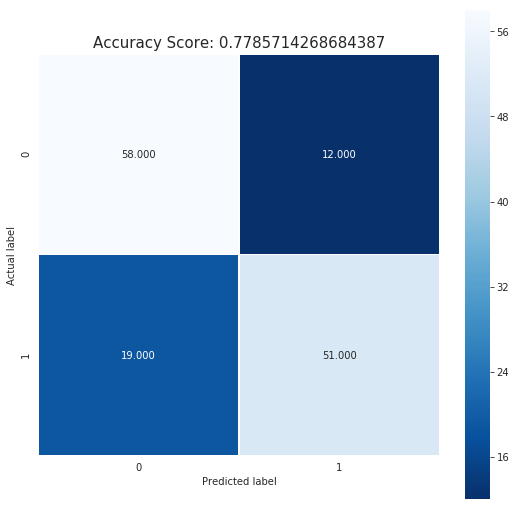

In [27]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test) # Predict values of the test set
testLoss, testAcc = model.evaluate(X_test, Y_test, verbose=0)
pred1hot = np.argmax(pred, axis=1) # Convert predicted classes to one hot vectors
y_test = to_categorical(Y_test, num_classes = classNum) 
y_test1hot = np.argmax(Y_test, axis=1) # Convert true classes to one hot vectors
cm = confusion_matrix(y_test1hot, pred1hot) #confusion matrix
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


testLoss, testAcc = model.evaluate(X_test, Y_test, verbose=0)

all_sample_title = 'Accuracy Score: {0}'.format(testAcc)
plt.title(all_sample_title, size = 15);

## Saving the model

In [28]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Let's Try!

In [36]:
!wget https://img-s2.onedio.com/id-553a2f679b938449229cee67/rev-0/raw/s-50cdc6132cfa31fb3a0a43263997af4e2fb0c8b5.jpg -O test_img.jpg
!ls

from skimage.io import imread
from skimage.transform import resize
from io import StringIO
# TODO: Görüntüyü okuyalım:
# TODO: Görüntüyü yeniden boyutlandıralım:
# TODO: Görüntüyü Numpy Array haline getirip batch axis ekleyelim.
img_size = 64
img = imread("test_img.jpg")
img = resize(img, (img_size, img_size, 3))
X = np.zeros((1, 64, 64, 3), dtype='float64')
X[0] = img
# TODO: Görüntüyü ekranda gösterelim:
#plt.imshow(img, interpolation='nearest')
#plt.axis("off")

#plt.show()
# Model çıktısını alalım:
Y_test_img = model.predict(X)
print('Olasılıklar:', Y_test_img[0])
Y_test_img = np.argmax(Y_test_img, axis=1)
Y_test_img = 'cat' if Y_test_img[0] == 0 else 'dog'
print('It is a '+ Y_test_img + ' !')

--2019-06-19 04:55:35--  https://img-s2.onedio.com/id-553a2f679b938449229cee67/rev-0/raw/s-50cdc6132cfa31fb3a0a43263997af4e2fb0c8b5.jpg
Resolving img-s2.onedio.com (img-s2.onedio.com)... 104.16.229.51, 104.16.228.51, 2606:4700::6810:e533, ...
Connecting to img-s2.onedio.com (img-s2.onedio.com)|104.16.229.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30196 (29K) [image/jpeg]
Saving to: ‘test_img.jpg’

test_img.jpg        100%[===================>]  29.49K  --.-KB/s    in 0s      

2019-06-19 04:55:35 (92.2 MB/s) - ‘test_img.jpg’ saved [30196/30196]

model.h5  model.json  sample_data  test_img.jpg  X.npy	Y.npy
Olasılıklar: [0.35671487 0.64328516]
It is a dog !
